In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [32]:
url = "iris.csv"
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data = pd.read_csv(url, header=None, names=columns)

In [33]:
X = data.iloc[:, :-1].values  # Các thuộc tính
y = data.iloc[:, -1].values    # Loài hoa

In [34]:
#  |Dtrain|=(2/3).|D|, |Dtest|=(1/3).|D|
np.random.seed(42)
indices = np.random.permutation(len(data))
train_size = int(len(data) * 2 / 3)
train_indices, test_indices = indices[:train_size], indices[train_size:]

In [35]:
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


In [36]:
# Hàm tính xác suất điều kiện
def calculate_probabilities(X, y):
    classes = np.unique(y)
    mean_var = {}
    for cls in classes:
        X_cls = X[y == cls]
        mean_var[cls] = {
            'mean': np.mean(X_cls, axis=0),
            'var': np.var(X_cls, axis=0),
            'prior': len(X_cls) / len(y)
        }
    return mean_var


In [37]:
# Hàm tính xác suất Gaussian
def gaussian_probability(x, mean, var):
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

# Hàm dự đoán
def predict(X, mean_var):
    predictions = []
    for x in X:
        class_probs = {}
        for cls, params in mean_var.items():
            prob = params['prior']
            for i in range(len(x)):
                prob *= gaussian_probability(x[i], params['mean'][i], params['var'][i])
            class_probs[cls] = prob
        predictions.append(max(class_probs, key=class_probs.get))
    return np.array(predictions)

In [38]:
mean_var = calculate_probabilities(X_train, y_train)


y_pred = predict(X_test, mean_var)

accuracy = np.mean(y_pred == y_test)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")

Độ chính xác của mô hình: 0.96


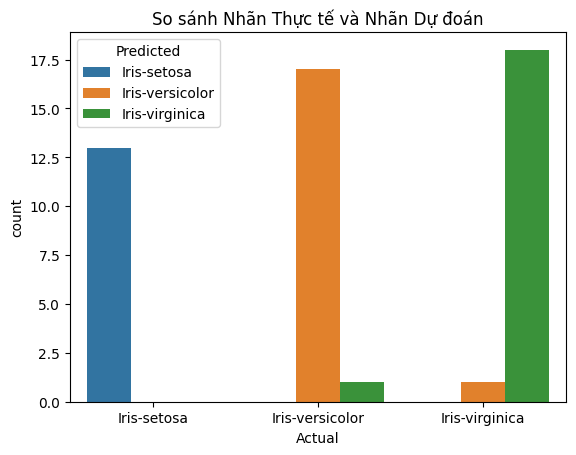

In [39]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.countplot(data=result_df, x='Actual', hue='Predicted')
plt.title('So sánh Nhãn Thực tế và Nhãn Dự đoán')
plt.show()